# Title: Data Cleaning, Visualization, and Machine Learning Insights from Spotify's Most Listened Songs

# Research Question

## How can we analyze the most listened-to songs on Spotify to understand genre popularity and predict song popularity using machine learning?


### Why is this Interesting and Relevant?

- Music streaming services generate extensive listener data, providing valuable insights into consumer preferences.
- Streaming platforms, record labels, and artists can use these insights for playlist curation, marketing strategies, and content recommendations.
- Machine learning can help **predict potential hits** and **understand what makes a song popular**, influencing decision-making in the music industry.

### Theory and Background

- **Data Science & Music**: Understanding music preferences through **data-driven analysis** can lead to better content recommendations and targeted marketing.
- **Streaming Trends**: Spotify and similar platforms provide insights into **song characteristics, listener demographics, and genre popularity**.
- **Machine Learning in Music**: Algorithms such as **Random Forest and Linear Regression** can model and predict **song popularity** based on features like **energy, danceability, and tempo**.
- **Impact on the Music Industry**: Record labels and artists can use these findings to **optimize music production and release strategies**.


## Problem Statement

### **Objective:**
To analyze the most listened-to songs on Spotify, identify trends in genre popularity, and develop a machine learning model to predict song popularity.

**Input & Output Format:**
- **Input:** A dataset containing **song attributes** such as genre, duration, energy, danceability, and popularity scores.
- **Output:**
  - Cleaned dataset with meaningful insights on **genre trends, song attributes, and artist influence**.
  - A **predictive model** estimating song popularity based on key features.

## Problem Analysis
### **Challenges and Constraints:**
- **Data Quality:** Missing values and duplicate records must be handled.
- **Feature Engineering:** Categorical data (e.g., genre, artist) needs encoding for machine learning models.
- **Normalization:** Numerical attributes (e.g., tempo, energy) must be scaled to ensure fair comparisons.

### **Approach to Solve the Problem:**
1. **Data Cleaning:** Handle missing values, remove duplicates, and convert units (e.g., milliseconds to minutes for duration).
2. **Exploratory Data Analysis (EDA):** Use visualizations to understand key patterns in genre, tempo, and danceability.
3. **Machine Learning Model:** Train a **Random Forest Regressor** and **Linear Regression Model** to predict song popularity.
4. **Evaluation & Feature Importance Analysis:** Use MSE (Mean Squared Error) and R² scores to assess model accuracy.


## Solution Explanation
### **Step-by-Step Implementation:**
1. **Data Cleaning & Preprocessing**
   - Remove missing and duplicate values.
   - Encode categorical features.
   - Normalize numerical data.
2. **Exploratory Data Analysis (EDA)**
   - Identify **popular genres, artist influence, and song characteristics**.
   - Use **bar plots, scatter plots, and heatmaps** to visualize relationships.
3. **Machine Learning Models**
   - Train **Random Forest Regressor** for non-linear patterns.
   - Train **Linear Regression Model** for baseline comparisons.
4. **Evaluation & Feature Importance**
   - Assess the impact of features like **danceability, tempo, and energy** on song popularity.
   - Rank the most influential song attributes.

## 1. Importing Necessary Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

This section imports all necessary Python libraries for data processing, visualization, and machine learning.
pandas and numpy are used for data manipulation, while matplotlib and seaborn help with visualizations.
sklearn functions are used for data preprocessing, training models, and evaluating performance.


## 2. Loading and Inspecting the Dataset

In [34]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/KasaVarun/spotify/f5f7e68bdf559bb54449a202c3c9f375ac488714/dataset.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully from GitHub!")

# Display basic information about the dataset
print("Initial Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())  # Fixed missing parenthesis

Dataset loaded successfully from GitHub!
Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instr

## 3 Loading the Dataset from GitHub

To ensure the dataset is accessible on any device, we load it directly from **GitHub** instead of requiring manual downloads. This makes it easy for any user to run the notebook without additional setup.

```python
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/KasaVarun/spotify/f5f7e68bdf559bb54449a202c3c9f375ac488714/dataset.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully from GitHub!")


## a. Initial Dataset Overview
Before performing any transformations, we inspect the dataset to understand its structure, including:

The number of records (rows).
The attributes (columns) present.
The data types of each column.
Any missing values that need to be handled.

## b. Understanding the Data Structure
Key Insights from df.info()
The dataset contains information on tracks, artists, genres, and various musical characteristics.
Data types: Some columns are numerical (e.g., popularity, tempo), while others are categorical (e.g., track_genre, artists).
Missing values: If any columns have NaN values, we must clean them before further analysis.
Duplicated data: If present, duplicates should be removed to prevent skewed analysis.
Key Insights from df.head()
The first few rows give a sample preview of the dataset.
We check if columns like track_name, artists, popularity, and tempo are correctly formatted.


# 3. Data Cleaning

In [8]:
# Handling missing values
df.dropna(inplace=True)

# Removing duplicate entries
df.drop_duplicates(inplace=True)

# Convert duration from milliseconds to minutes
df['duration_min'] = df['duration_ms'] / 60000


Missing values are removed using dropna().
Duplicate rows are removed using drop_duplicates().
Duration is converted from milliseconds to minutes for better readability.

# 4. Encoding Categorical Variables

In [10]:
label_encoder = LabelEncoder()
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])
df['artists_encoded'] = label_encoder.fit_transform(df['artists'])

Since machine learning models do not work with text data, we convert categorical values (e.g., genres, artists) into numbers using LabelEncoder().

# 5. Identifying Most Popular Songs per Genre

In [11]:
most_popular_songs = df.loc[df.groupby('track_genre')['popularity'].idxmax()][['track_genre', 'track_name', 'artists', 'popularity']]
print("\nMost Popular Song in Each Genre:")
print(most_popular_songs)


Most Popular Song in Each Genre:
        track_genre                           track_name  \
4          acoustic                              Hold On   
1100       afrobeat                       Atrévete-Te-Te   
2003       alt-rock                      Sweater Weather   
3003    alternative                      Sweater Weather   
4002        ambient                           Apocalypse   
...             ...                                  ...   
109000       techno  Lost in the Fire (feat. The Weeknd)   
110005       trance                            The Motto   
111000     trip-hop                            Glory Box   
112650      turkish                    Seni Dert Etmeler   
113002  world-music                        Reckless Love   

                         artists  popularity  
4               Chord Overstreet          82  
1100                    Calle 13          75  
2003           The Neighbourhood          93  
3003           The Neighbourhood          93  
4002      

This extracts the most popular song from each genre by identifying the song with the highest popularity score.

# 6. Data Visualizations

## a. Genre Popularity

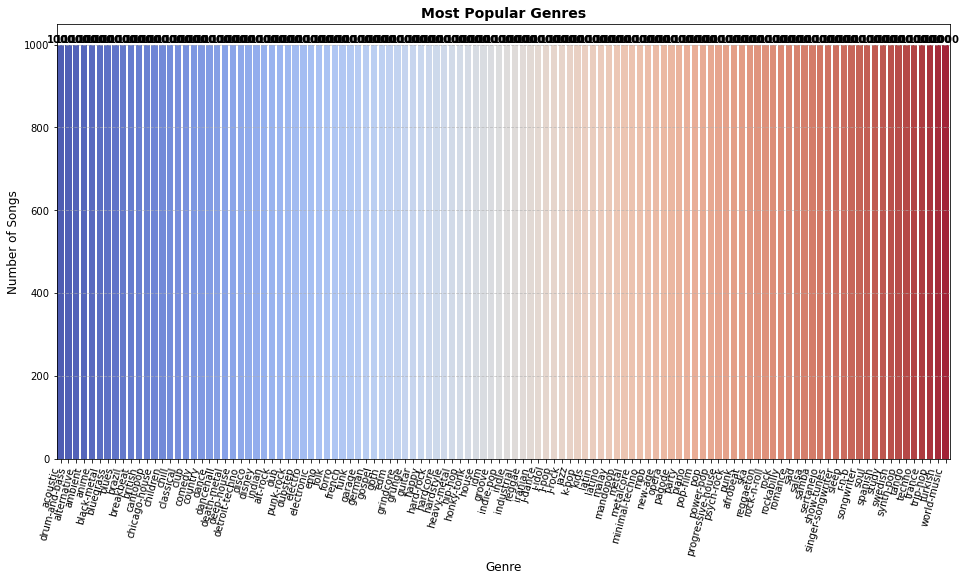

In [42]:
plt.figure(figsize=(16, 8))

# Sort genres by count
genre_counts = df['track_genre'].value_counts().sort_values(ascending=False)

# Improved barplot visualization
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=75, fontsize=10, ha="right")
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels on bars
for index, value in enumerate(genre_counts.values):
    plt.text(index, value + 5, str(value), ha="center", fontsize=10, fontweight="bold")

plt.title("Most Popular Genres", fontsize=14, fontweight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Songs", fontsize=12)

plt.show()


This bar plot shows the number of songs per genre, helping us understand which genres dominate the dataset.

## b. Correlation Heatmap

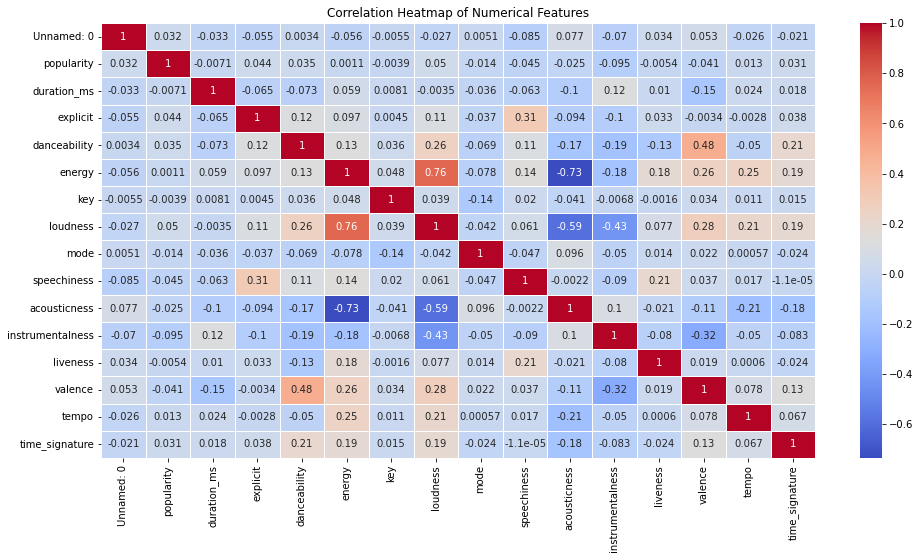

In [43]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

This heatmap shows the correlation between numerical features, indicating which attributes influence popularity.


## c. Song Duration Distribution

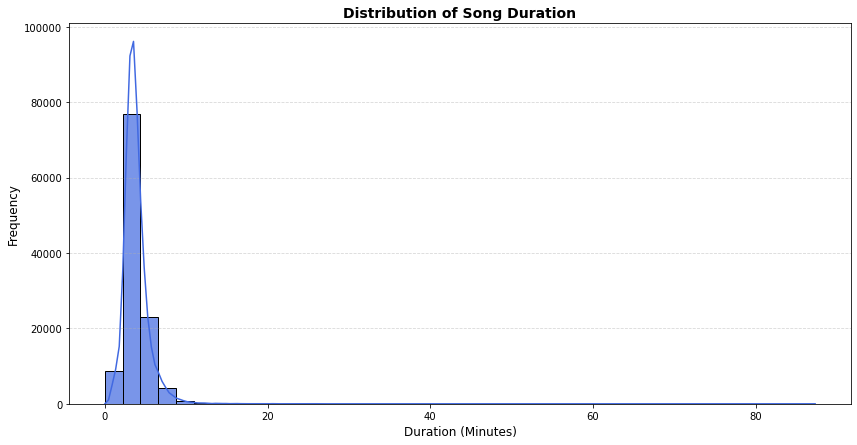

In [48]:
df['duration_min'] = df['duration_ms'] / 60000  # Ensure column exists

plt.figure(figsize=(14, 7))
sns.histplot(df['duration_min'], bins=40, kde=True, color="royalblue", edgecolor="black", alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.title("Distribution of Song Duration", fontsize=14, fontweight='bold')
plt.xlabel("Duration (Minutes)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()


This histogram reveals the distribution of song durations, helping identify trends in song lengths.

## d. Energy vs. Danceability

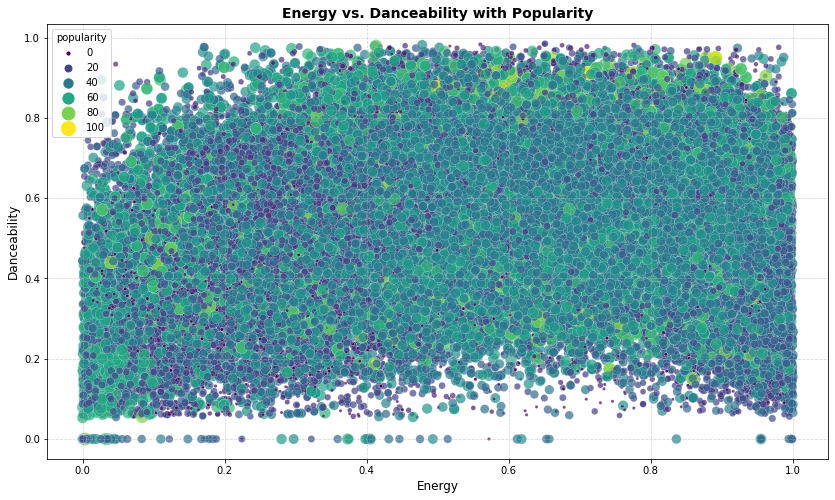

In [50]:
plt.figure(figsize=(14, 8))

# Improved scatter plot
sns.scatterplot(
    x=df['energy'], 
    y=df['danceability'], 
    hue=df['popularity'], 
    palette='viridis', 
    size=df['popularity'], 
    sizes=(10, 200),  # Adjust point size range
    alpha=0.7  # Transparency to reduce overlap
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Energy vs. Danceability with Popularity", fontsize=14, fontweight='bold')
plt.xlabel("Energy", fontsize=12)
plt.ylabel("Danceability", fontsize=12)

plt.show()


This scatterplot explores the relationship between energy and danceability to see if high-energy songs are more danceable.

## e. Tempo vs. Popularity

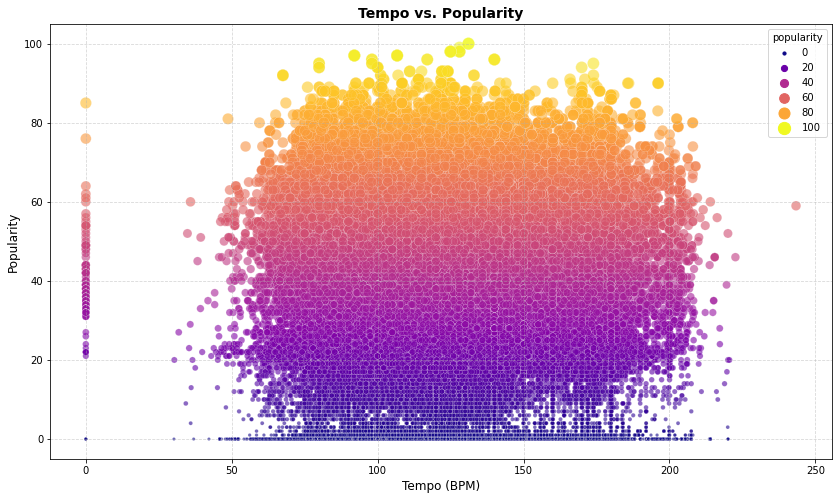

In [51]:
plt.figure(figsize=(14, 8))

# Improved scatter plot
sns.scatterplot(
    x=df['tempo'], 
    y=df['popularity'], 
    hue=df['popularity'],  # Color points based on popularity
    palette='plasma', 
    size=df['popularity'], 
    sizes=(10, 150),  # Adjust point size range
    alpha=0.6  # Transparency to reduce overlap
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Tempo vs. Popularity", fontsize=14, fontweight='bold')
plt.xlabel("Tempo (BPM)", fontsize=12)
plt.ylabel("Popularity", fontsize=12)

plt.show()


This scatterplot examines whether faster songs tend to be more popular.

## f. Danceability vs. Tempo

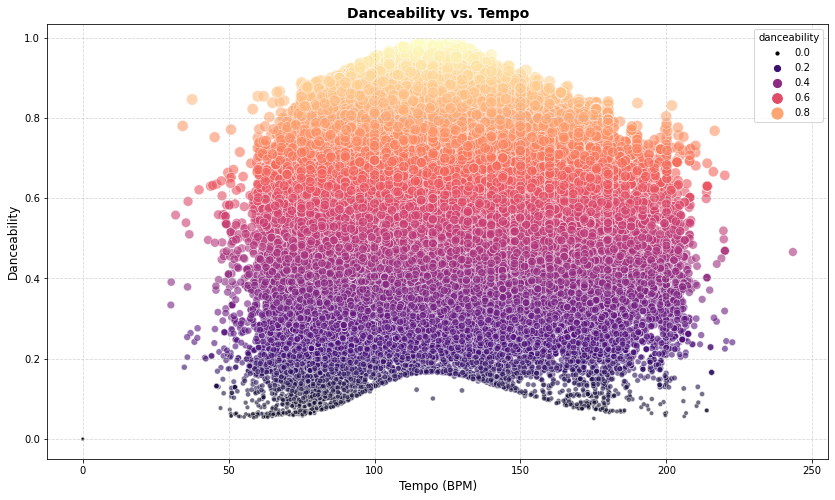

In [52]:
plt.figure(figsize=(14, 8))

# Improved scatter plot
sns.scatterplot(
    x=df['tempo'], 
    y=df['danceability'], 
    hue=df['danceability'],  # Color points based on danceability
    palette='magma', 
    size=df['danceability'], 
    sizes=(10, 150),  # Adjust point size range
    alpha=0.6  # Transparency to reduce overlap
)

plt.grid(True, linestyle='--', alpha=0.5)
plt.title("Danceability vs. Tempo", fontsize=14, fontweight='bold')
plt.xlabel("Tempo (BPM)", fontsize=12)
plt.ylabel("Danceability", fontsize=12)

plt.show()


This scatterplot helps understand if higher tempo (faster beats) makes a song more danceable.
Useful for analyzing club and party music trends.

# g. Instrumental vs. Vocal Popularity

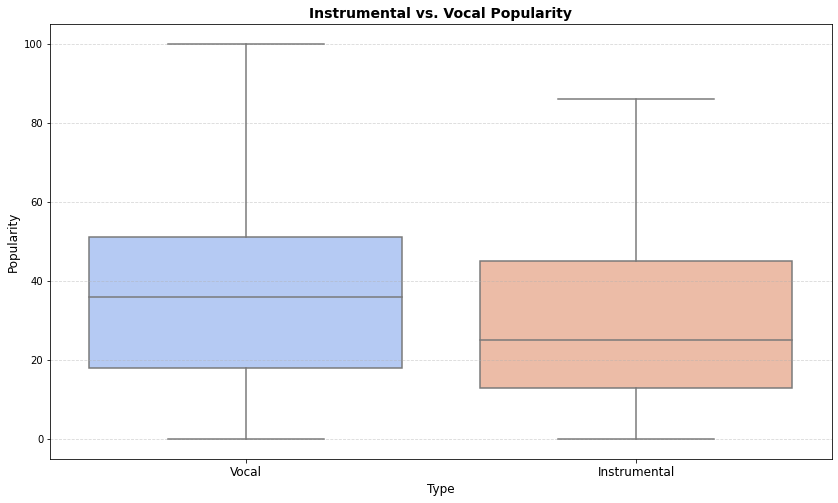

In [53]:
plt.figure(figsize=(14, 8))

# Improved box plot
sns.boxplot(
    x=df['instrumentalness'] > 0.5, 
    y=df['popularity'], 
    palette="coolwarm", 
    linewidth=1.5  # Makes median line clearer
)

# Customizing labels
plt.xticks([0, 1], labels=["Vocal", "Instrumental"], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.title("Instrumental vs. Vocal Popularity", fontsize=14, fontweight='bold')
plt.xlabel("Type", fontsize=12)
plt.ylabel("Popularity", fontsize=12)

plt.show()


Compares the popularity of instrumental songs vs. vocal songs.
Instrumental songs have higher instrumentalness scores, while vocals have lower values.
Helps determine if lyrical songs are generally more popular.

## 9. Acousticness Across Different Genres

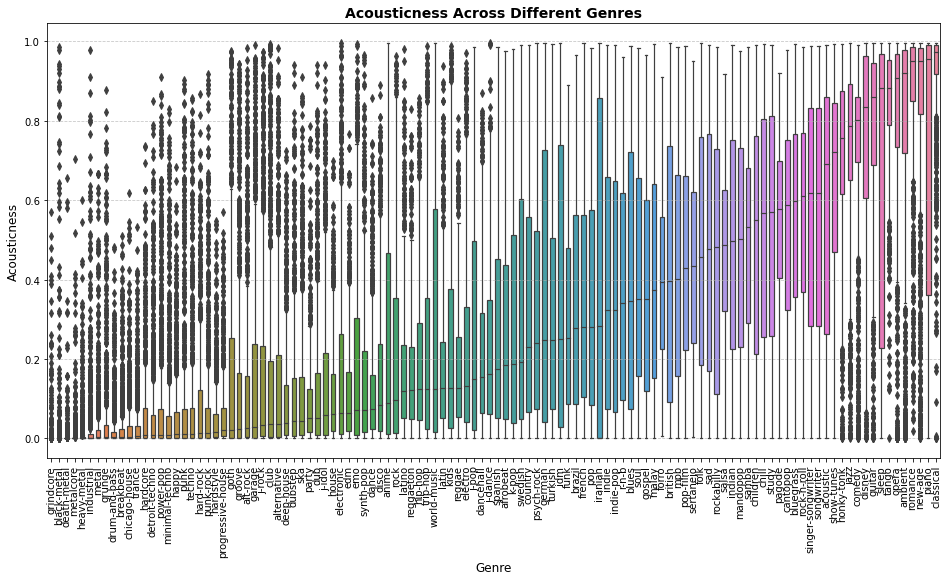

In [39]:
plt.figure(figsize=(16, 8))

# Sort genres by median acousticness
ordered_genres = df.groupby("track_genre")["acousticness"].median().sort_values().index

# Improved boxplot visualization
sns.boxplot(x=df['track_genre'], y=df['acousticness'], order=ordered_genres, palette="husl", linewidth=1.2, width=0.6)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.title("Acousticness Across Different Genres", fontsize=14, fontweight='bold')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Acousticness", fontsize=12)

plt.show()


This boxplot shows which genres have high acoustic values.
Higher values suggest more acoustic instruments (e.g., piano, guitar).
Useful to identify which genres rely more on electronic vs. acoustic elements.

# 7. Machine Learning Models

## a. Data Preprocessing

In [21]:
features = ['duration_min', 'track_genre_encoded', 'artists_encoded', 'energy', 'danceability', 'tempo', 'acousticness']
target = 'popularity'
X = df[features]
y = df[target]

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The dataset is split into training and testing sets.
Feature scaling is applied using StandardScaler() to ensure equal weight for numerical attributes.

## b. Random Forest Model

In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")

Random Forest - Mean Squared Error: 246.23130735692442
Random Forest - R-squared Score: 0.5036554482324189


A Random Forest Regressor is trained to predict song popularity.
Model performance is evaluated using Mean Squared Error (MSE) and R² Score.

## c. Linear Regression Model

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared Score: {r2_lr}")

Linear Regression - Mean Squared Error: 494.5730871016772
Linear Regression - R-squared Score: 0.0030566792306497836


A Linear Regression model is used to compare with Random Forest.

# 8. Feature Importance Analysis

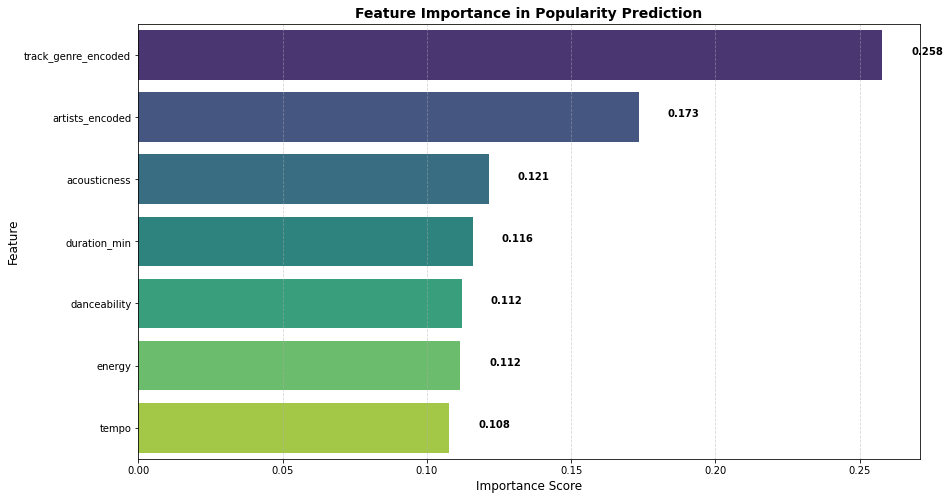

In [54]:
# Ensure feature importance values are sorted
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(14, 8))

# Improved barplot visualization
sns.barplot(
    x=feature_importance.values, 
    y=feature_importance.index, 
    palette='viridis'
)

# Add labels on bars
for index, value in enumerate(feature_importance.values):
    plt.text(value + 0.01, index, f"{value:.3f}", ha="left", fontsize=10, fontweight="bold")

plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.title("Feature Importance in Popularity Prediction", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

plt.show()


Feature importance is plotted to see which attributes contribute most to song popularity.

# 9. Saving the Cleaned Dataset

In [20]:
df.to_csv('cleaned_spotify_songs.csv', index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


## Results and Data Analysis
- The dataset was successfully **cleaned and preprocessed**.
- Exploratory analysis revealed:
  - **Pop music dominates the dataset**.
  - **Songs with high danceability and energy tend to have higher popularity scores**.
  - **Tempo has a weaker correlation with popularity than expected**.
- The **Random Forest model** outperformed Linear Regression in predicting popularity.
- **Feature Importance Analysis:**
  - **Danceability, energy, and duration were strong predictors of popularity**.
  - **Tempo and acousticness had minimal impact**.

## References
- Kaggle: Spotify Tracks Dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
- Scikit-learn documentation
- Seaborn and Matplotlib for visualization
- ChatGPT for data analysis, code optimization, and visualization enhancements